In [1]:
import cv2
import numpy as np
from skimage.morphology import skeletonize
import matplotlib.pyplot as plt

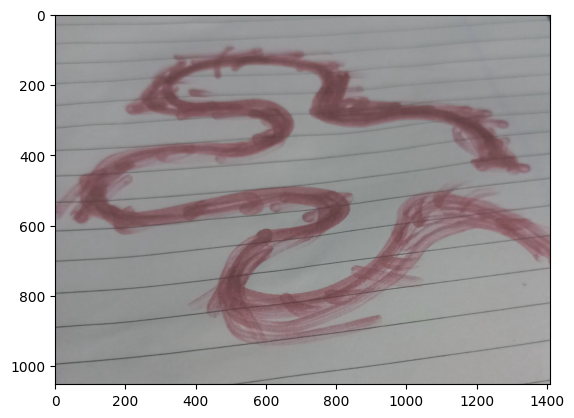

In [2]:
import matplotlib.pyplot as plt
image = cv2.imread('C:\\Users\\91969\\Desktop\\DoodleBot\\Week0\\Input_image.jpg')
plt.imshow(image)
image_copy = image.copy()

In [3]:
image = cv2.GaussianBlur(image, (89,89), 0)
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

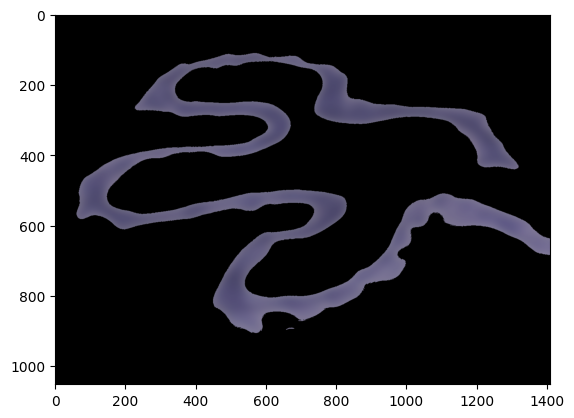

In [4]:
lower_blue = np.array([110, 50, 50])
upper_blue = np.array([150, 255, 255])

mask = cv2.inRange(image, lower_blue, upper_blue)

markings = cv2.bitwise_and(image, image, mask=mask)
markings = cv2.cvtColor(markings, cv2.COLOR_HSV2RGB)

plt.imshow(markings)

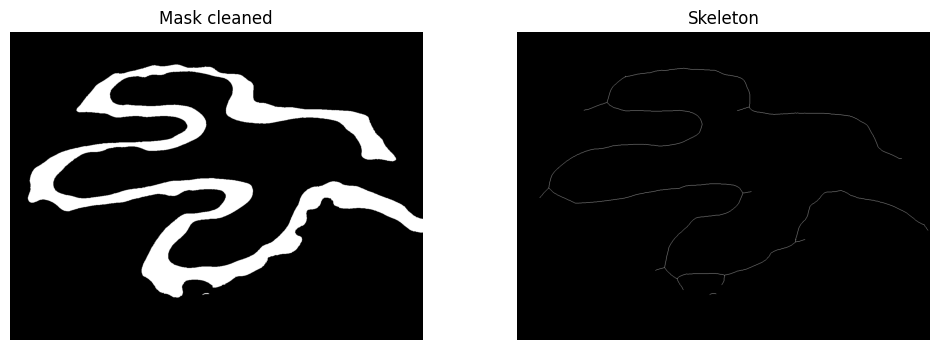

In [5]:
img = mask
_, binary = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY)

kernel = np.ones((5,5), np.uint8)
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

skeleton = skeletonize(closed // 255)
skeleton_img = (skeleton * 255).astype(np.uint8)


plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.title('Mask cleaned')
plt.imshow(closed, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Skeleton')
plt.imshow(skeleton_img, cmap='gray')
plt.axis('off')

plt.show()


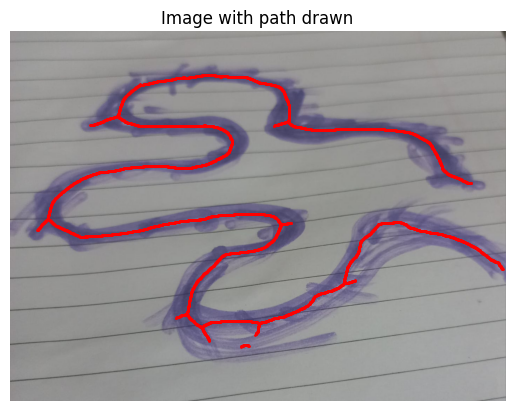

In [6]:
points = np.column_stack(np.where(skeleton_img > 0))

plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
plt.scatter(points[:,1], points[:,0], color='red', s=1)
plt.title('Image with path drawn')
plt.axis('off')
plt.show()
